In [1]:
%run Standard_functions.ipynb

# Understanding simplified attention mechanism with an simple example (Your journey starts with one step)

In [5]:
import torch
inputs = torch.tensor(
    [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]]) # step     (x^6)

print(inputs)

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])


Axes3D(0.125,0.11;0.775x0.77)


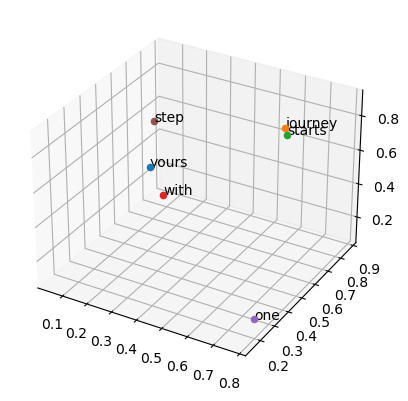

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

words = ['yours', 'journey', 'starts', 'with', 'one', 'step']

#Extract X,Y,Z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()


#Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

#plot each point and annotate with corresponding word
for x,y,z,word in zip(x_coords,y_coords,z_coords,words):
    ax.scatter(x,y,z)
    ax.text(x,y,z,word,fontsize=10)

#set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

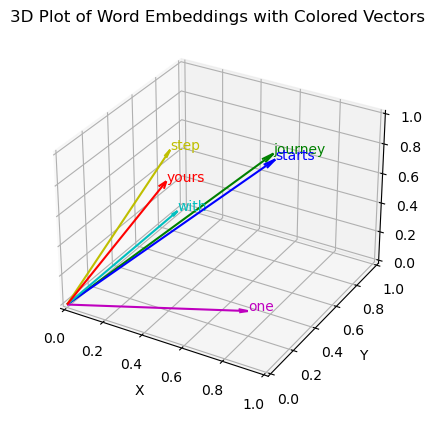

In [38]:
#create 3D plot with vectors from origin to each point using different colors
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

#Define list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

#plot each vector with different color and annotate with corresponding word
for x,y,z,word,color in zip(x_coords,y_coords,z_coords,words,colors):
    #Draw vector from origin of points with specified color and smaller arrow length ratio
    ax.quiver(0,0,0,x,y,z,color=color,arrow_length_ratio=0.05)
    ax.text(x,y,z,word,fontsize=10,color=color)


# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

# sample understanding of finding context vector (Example: journey)

In [66]:
#Intermediate attension scores are calculated between query token and each input token

query = inputs[1]

attn_score_2 = torch.empty(inputs.shape[0])

for i , x_i in enumerate(inputs):
    #print("iteration",i)
    #print("input query",x_i)
    attn_score_2[i] = torch.dot(x_i,query)

print("Attention Scores",attn_score_2)
print("Sum:", attn_score_2.sum())

Attention Scores tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
Sum: tensor(6.5617)


# Normalization of attention scores which we receive above

In [51]:
#Normalization is done to obtain attention weights which sum up to 1

#Normalization is useful for interpretation and for maintaining training stability in an LLM

In [68]:
attn_weight_2_tmp = attn_score_2/attn_score_2.sum()

print("Attention weights:", attn_weight_2_tmp)
print("Sum of attention weights:", attn_weight_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum of attention weights: tensor(1.0000)


In [69]:
#Attention scores and attention weights are intuitively same , only difference is summation of attention weights is equal to 1

In [70]:
def softmax_naive(x):
    return torch.exp(x)/torch.exp(x).sum(dim=0)

attn_weight_2_tmp = softmax_naive(attn_score_2)

print("Attention weights:", attn_weight_2_tmp)
print("Sum of attention weights:", attn_weight_2_tmp.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum of attention weights: tensor(1.)


In [63]:
#Above softmax implementation has certain drawbacks , it might lead to overflow or underflow if the input values are very large or very small respectively,
#Hence in order to overcome the above issue pytorch implementation should be taken into consideration

In [71]:
attn_weights_2 = torch.softmax(attn_score_2,dim=0)

print("Attention weights:", attn_weights_2)
print("Sum of attention weights:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum of attention weights: tensor(1.)


In [72]:
#Context vector implementation

In [91]:
query = inputs[1]

context_vec_2 = torch.zeros(query.shape)

for i , x_i in enumerate(inputs):
    #print("iteration", i)
    #print("input",x_i)
    context_vec_2 += attn_weights_2[i]*x_i
print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


In [92]:
#For the entire Input set computing attension scores , attention weights , context vectors

In [93]:
attn_scores = inputs @ inputs.T

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [105]:
attn_weights = torch.softmax(attn_scores,dim=-1)

print(attn_weights)
print(attn_weights.sum(dim=-1))

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [99]:
0.2006+0.2379+0.2369+0.2074+0.1958+0.2184

1.297

In [103]:
0.1385+0.2379+0.2333+0.1240+0.1082+0.1581

1.0

In [106]:
all_context_vec = attn_weights @ inputs

print(all_context_vec)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])
